# Maximum Likelihood Estimation For the Normal Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

### Gaussian/normal distribution 

In [3]:
def gaussian(x,mu,sig):
    return 1/np.sqrt(2*np.pi*np.power(sig,2.0))*np.exp(-np.power(x-mu,2.0)/(2*np.power(sig,2.0)))

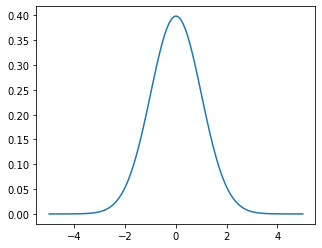

In [4]:
x = np.linspace(-5,5,100)
y = gaussian(x,0,1)
plt.figure(figsize=(5,4))
plt.plot(x,y,'-')
plt.show()

In [5]:
# example of likelihood and probability


### MLE for simple linear regression

In [198]:
n_x = 100

a = 3
b = 4
sig = 4

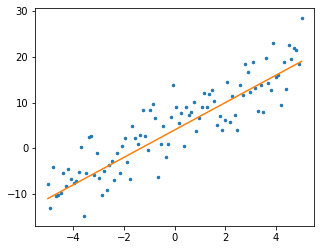

In [199]:
x = np.linspace(-5,5,n_x)
y_true = a*x + b
y =  y_true + np.random.normal(scale=sig,size=n_x)


plt.figure(figsize=(5,4))
plt.plot(x,y,'.',markersize=5)
plt.plot(x,y_true)
plt.show()

In [200]:
# ...
# note: mu is set (must be) zeros because we already know that the noise is gaussian.
#       we could also estimate mu and the estimated value from MLE will be zero.
def log_likelihood(a,b,sig,x,y):
    y_fit = a*x + b
    y_res = y - y_fit
    
    n = len(y_res)
    return -np.sum(np.log(gaussian(y_res,0,sig)))


In [201]:
l_max = log_likelihood(3,4,4,x,y)

#### Grid search

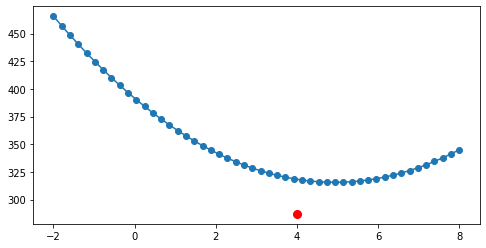

In [202]:
b_vec = np.linspace(-2,8,50)
l_b_vec = np.zeros((50,1))
for i in range(50):
    l_b_vec[i] = log_likelihood(4,b_vec[i],4,x,y)

plt.figure(figsize=(8,4))
plt.plot(b_vec,l_b_vec,'-o',)
plt.plot(4,l_max,'ro',markersize=8)
plt.show()

#### Using tensorflow and GD to find the coefficients

In [203]:
a = tf.Variable(10.0)
b = tf.Variable(10.0)
sig = tf.Variable(10.0)

@tf.function()
def log_likelihood():
    y_fit = a*x + b
    y_res = y - y_fit
    return 0.5*(n_x*np.log(2*np.pi) + n_x*tf.math.log(tf.pow(sig,2.0))
                + tf.math.reduce_sum(tf.math.square(y_res))/tf.pow(sig,2.0))

In [205]:
# the mle loss function can be solved analyically
# but we just use the gradient descent to approach the solution quantitatively

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
for i in range(1000):
    if np.mod(i,100) == 0:
        print ('iteration = {:d}, log_likelihood = {:.1f}'.format(i,log_likelihood().numpy()))
    opt.minimize(log_likelihood, var_list=[a,b,sig])

iteration = 0, log_likelihood = 557.2
iteration = 100, log_likelihood = 291.5
iteration = 200, log_likelihood = 283.9
iteration = 300, log_likelihood = 283.9
iteration = 400, log_likelihood = 283.9
iteration = 500, log_likelihood = 283.9
iteration = 600, log_likelihood = 283.9
iteration = 700, log_likelihood = 283.9
iteration = 800, log_likelihood = 283.9
iteration = 900, log_likelihood = 283.9


In [209]:
y_fit = a*x + b

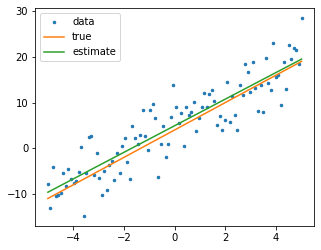

In [219]:
plt.figure(figsize=(5,4))
plt.plot(x,y,'.',markersize=5,label='data')
plt.plot(x,y_true,label='true')
plt.plot(x,y_fit,label='estimate')
plt.legend()
plt.show()

## Bayesian Inference for the distribution (uncertainty infomation)

Note: MLE or MAP give the actual value (point) of the coefficients. Bayesian Inference give the distribution of the estimates.


prior*likelihood <-> postior

In [ ]:
#### pr_mu = 0
pr_sig = 3

pr = gaussian(3,pr_mu,pr_sig)

y_res = y - (5*x+9)
r = np.sqrt(np.dot(y_res,y_res))
likelihood = gaussian(r,pr_mu,pr_sig)

po = likelihood*pr
po

array([ 3.25985532e+00, -2.35170507e+00,  6.20811229e+00, -3.65134275e-01,
       -3.89290995e-01, -2.90146486e-01,  3.67497493e+00,  6.63712095e-01,
        4.12661068e+00,  1.49433488e+00,  3.32639019e-01,  5.50671734e-01,
        2.17330090e+00,  7.25606920e+00, -8.04986660e+00,  1.09758321e+00,
        8.66069798e+00,  8.43419665e+00, -4.18996500e-01,  4.19038391e+00,
       -1.53978919e+00, -5.67865373e+00, -6.57400202e-01, -5.12255524e+00,
        8.70281647e-03,  5.65240143e-01, -3.83946056e+00,  1.71434945e+00,
       -2.96744679e+00,  2.66989713e+00,  4.19946263e+00, -1.34143509e+00,
       -5.49937310e+00,  5.89166988e+00,  2.99161123e+00,  1.40661415e+00,
        3.00004212e+00,  8.04433380e+00,  2.17023223e+00, -1.27883513e+00,
        7.32611126e+00,  8.27057495e+00,  4.80387283e+00, -8.36127826e+00,
       -1.32747186e+00,  2.19219551e+00, -4.95532768e+00, -2.24849475e+00,
        3.25721661e+00,  9.94031761e+00,  4.85660258e+00,  1.14432703e+00,
        2.99375821e+00, -